In [15]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dicionario)
vis

In [38]:
query = next(iter(corpus))
result = index[query]

for similarities in index:
    df.loc[len(df)] = similarities

In [15]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dicionario)
vis

KeyboardInterrupt: 

In [1]:
from gensim import corpora, models, similarities
from string import punctuation
from pprint import pprint

In [2]:
import pandas as pd
import seaborn as sns
from collections import OrderedDict

In [3]:
import pyLDAvis
import pyLDAvis.gensim

In [4]:
dicionario = corpora.Dictionary.load('wikileaks.dict')
corpus = corpora.MmCorpus('wikileaks.mm')

In [5]:
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [7]:
lsi = models.LsiModel.load('wikileaks.lsi')
lda = models.LdaModel.load('wikileaks.lda')

In [8]:
data = {i: OrderedDict(lsi.show_topic(i,10)) for i in range(20)}
pd.DataFrame(data)

0         1   2   3         4         5         6   \
government    0.353274       NaN NaN NaN -0.217217 -0.148161  0.513236   
state         0.200810       NaN NaN NaN  0.173688  0.186104       NaN   
country       0.175180       NaN NaN NaN       NaN       NaN       NaN   
year          0.174874       NaN NaN NaN       NaN       NaN       NaN   
law           0.172138  0.170776 NaN NaN       NaN       NaN  0.128989   
...                ...       ...  ..  ..       ...       ...       ...   
bangka             NaN       NaN NaN NaN       NaN       NaN       NaN   
indonesia          NaN       NaN NaN NaN       NaN       NaN       NaN   
headquarters       NaN       NaN NaN NaN       NaN       NaN       NaN   
brigadier          NaN       NaN NaN NaN       NaN       NaN       NaN   
class              NaN       NaN NaN NaN       NaN       NaN       NaN   

                   7   8         9         10        11       12        13  \
government        NaN NaN       NaN  0.516014  0.116085      NaN       NaN   
state         0.52244 NaN       NaN  0.140070       NaN -0.33817  0.180903   
country           NaN NaN -0.160708       NaN       NaN      NaN       NaN   
year              NaN NaN       NaN       NaN       NaN      NaN       NaN   
law               NaN NaN  0.361219 -0.137409       NaN      NaN       NaN   
...               ...  ..       ...       ...       ...      ...       ...   
bangka            NaN NaN       NaN       NaN       NaN      NaN       NaN   
indonesia         NaN NaN       NaN       NaN       NaN      NaN       NaN   
headquarters      NaN NaN       NaN       NaN       NaN      NaN       NaN   
brigadier         NaN NaN       NaN       NaN       NaN      NaN       NaN   
class             NaN NaN       NaN       NaN       NaN      NaN       NaN   

              14        15  16        17        18        19  
government   NaN       NaN NaN  0.110463       NaN       NaN  
state        NaN  0.139936 NaN       NaN -0.189424       NaN  
country      NaN       NaN NaN       NaN       NaN       NaN  
year         NaN       NaN NaN       NaN       NaN       NaN  
law          NaN       NaN NaN  0.142735 -0.135083 -0.150715  
...           ..       ...  ..       ...       ...       ...  
bangka       NaN       NaN NaN       NaN       NaN  0.226229  
indonesia    NaN       NaN NaN       NaN       NaN  0.199839  
headquarters NaN       NaN NaN       NaN       NaN  0.154863  
brigadier    NaN       NaN NaN       NaN       NaN  0.153297  
class        NaN       NaN NaN       NaN       NaN  0.149421  

[67 rows x 20 columns]

In [9]:
print(lsi.show_topic(9,4))
OrderedDict(lsi.show_topic(9,4))

[('law', 0.3612189043949061), ('percent', -0.3344619497398605), ('victim', -0.2502248045528624), ('labor', 0.22286415244325858)]


OrderedDict([('law', 0.3612189043949061),
             ('percent', -0.3344619497398605),
             ('victim', -0.2502248045528624),
             ('labor', 0.22286415244325858)])

In [10]:
df = pd.DataFrame(data)
print(df.shape)
df = df.fillna(0).T

(67, 20)


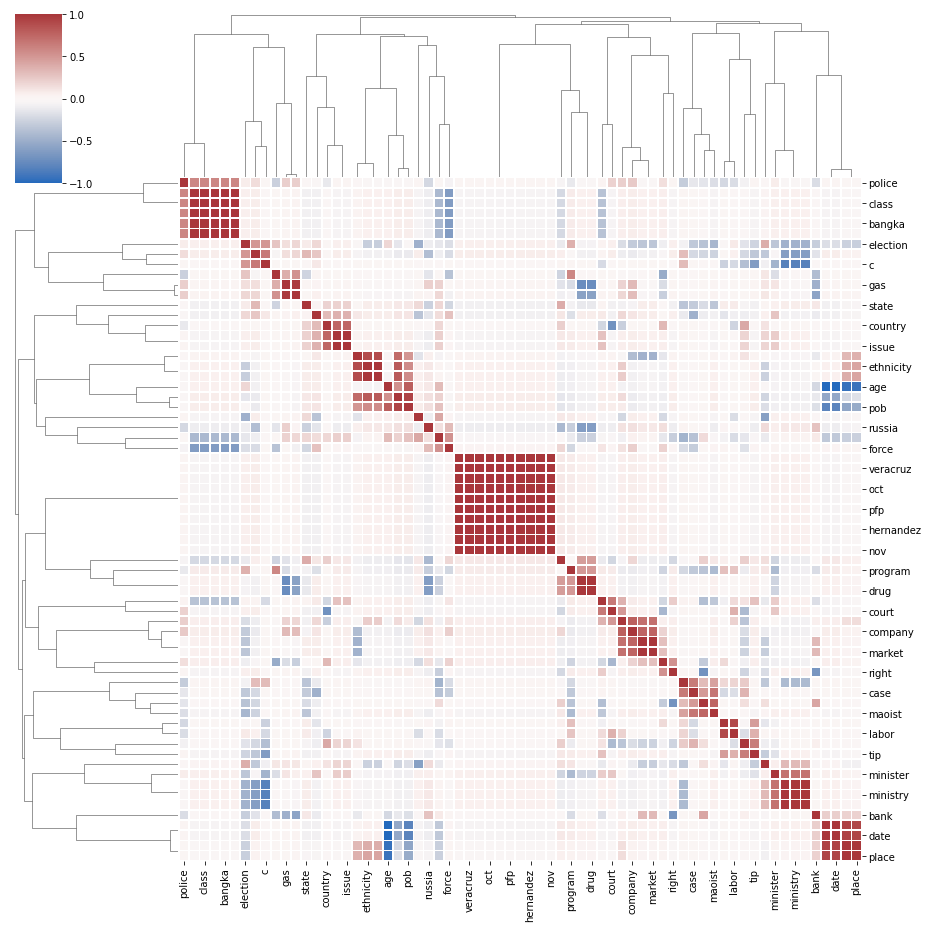

In [11]:
sns.clustermap(df.corr(), center=0, cmap="vlag", metric='cosine',
               linewidths=.75, figsize=(13, 13))

In [14]:
lsi.print_topics()

[(0,
  '0.353*"government" + 0.201*"state" + 0.175*"country" + 0.175*"year" + 0.172*"law" + 0.139*"party" + 0.135*"minister" + 0.130*"victim" + 0.124*"security" + 0.121*"issue"'),
 (1,
  '0.410*"victim" + 0.301*"child" + -0.268*"party" + 0.222*"labor" + -0.179*"election" + -0.174*"president" + 0.171*"law" + -0.166*"minister" + -0.158*"c" + 0.152*"tip"'),
 (2,
  '0.338*"name" + -0.311*"investment" + -0.241*"percent" + -0.241*"bank" + -0.233*"company" + 0.215*"party" + 0.168*"victim" + 0.156*"election" + -0.152*"sector" + -0.140*"market"'),
 (3,
  '-0.724*"name" + -0.218*"father" + 0.196*"party" + -0.186*"birth" + -0.158*"pob" + -0.144*"ethnicity" + -0.133*"grandfather" + 0.131*"election" + -0.121*"investment" + -0.112*"place"'),
 (4,
  '-0.520*"party" + -0.312*"election" + 0.227*"security" + -0.217*"government" + -0.185*"percent" + 0.174*"state" + -0.149*"name" + -0.120*"investment" + 0.118*"meeting" + -0.116*"labor"'),
 (5,
  '-0.361*"minister" + -0.324*"child" + -0.289*"labor" + 0.241

In [12]:
data = {i: OrderedDict(lda.show_topic(i,10)) for i in range(20)}
pd.DataFrame(data)

0   1   2   3         4         5   6   7         8   \
program      0.016657 NaN NaN NaN       NaN       NaN NaN NaN       NaN   
state        0.013764 NaN NaN NaN  0.015940  0.011122 NaN NaN  0.014496   
assistance   0.013399 NaN NaN NaN       NaN       NaN NaN NaN       NaN   
country      0.013157 NaN NaN NaN  0.011095       NaN NaN NaN       NaN   
development  0.012885 NaN NaN NaN       NaN       NaN NaN NaN       NaN   
...               ...  ..  ..  ..       ...       ...  ..  ..       ...   
embassy           NaN NaN NaN NaN       NaN       NaN NaN NaN       NaN   
visa              NaN NaN NaN NaN       NaN       NaN NaN NaN       NaN   
travel            NaN NaN NaN NaN       NaN       NaN NaN NaN       NaN   
airport           NaN NaN NaN NaN       NaN       NaN NaN NaN       NaN   
service           NaN NaN NaN NaN       NaN       NaN NaN NaN       NaN   

                   9   10  11        12        13  14        15  16  17  18  \
program           NaN NaN NaN       NaN  0.019813 NaN       NaN NaN NaN NaN   
state        0.014189 NaN NaN       NaN       NaN NaN  0.012013 NaN NaN NaN   
assistance        NaN NaN NaN       NaN       NaN NaN       NaN NaN NaN NaN   
country      0.013076 NaN NaN  0.018585       NaN NaN       NaN NaN NaN NaN   
development       NaN NaN NaN       NaN       NaN NaN       NaN NaN NaN NaN   
...               ...  ..  ..       ...       ...  ..       ...  ..  ..  ..   
embassy           NaN NaN NaN       NaN       NaN NaN       NaN NaN NaN NaN   
visa              NaN NaN NaN       NaN       NaN NaN       NaN NaN NaN NaN   
travel            NaN NaN NaN       NaN       NaN NaN       NaN NaN NaN NaN   
airport           NaN NaN NaN       NaN       NaN NaN       NaN NaN NaN NaN   
service           NaN NaN NaN       NaN       NaN NaN       NaN NaN NaN NaN   

                   19  
program           NaN  
state        0.020024  
assistance        NaN  
country           NaN  
development       NaN  
...               ...  
embassy      0.041705  
visa         0.018909  
travel       0.013756  
airport      0.012646  
service      0.011749  

[144 rows x 20 columns]

In [13]:
df = pd.DataFrame(data)
print(df.shape)
df = df.fillna(0).T

(144, 20)


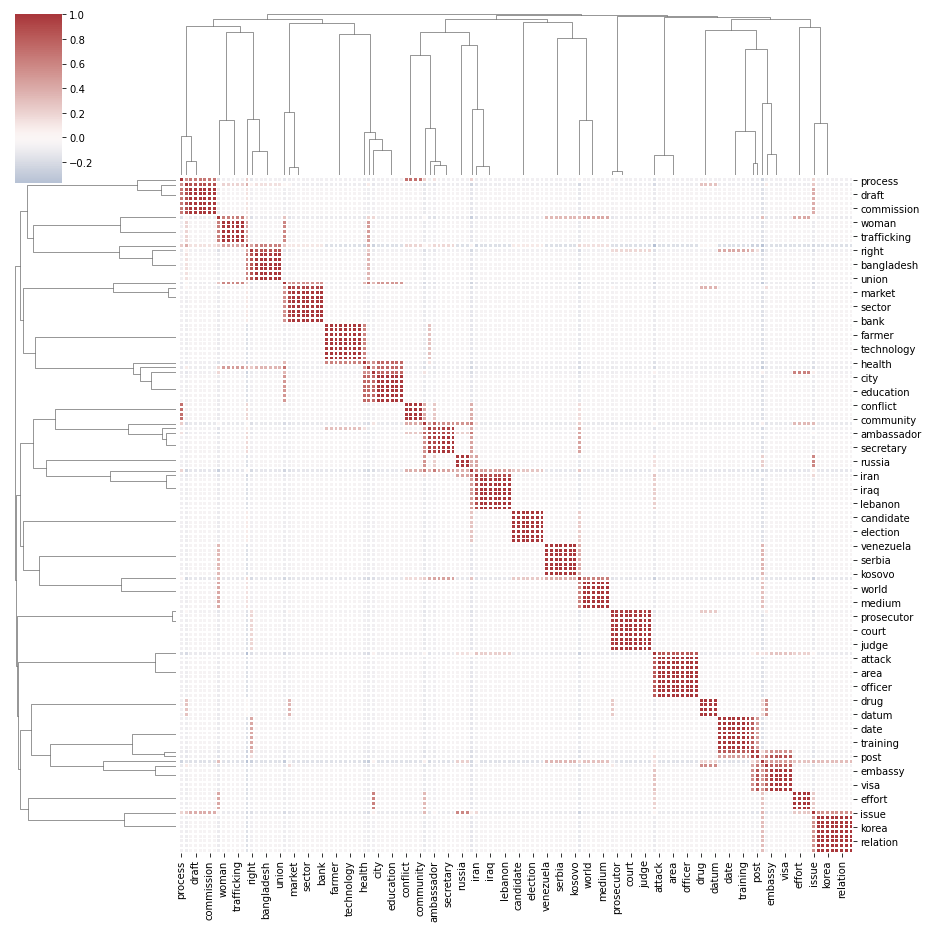

In [14]:
sns.clustermap(df.corr(), center=0, cmap="vlag", metric='cosine',
               linewidths=.75, figsize=(13, 13))

In [26]:
from gensim.corpora.textcorpus import TextCorpus
from gensim.test.utils import datapath, get_tmpfile
from gensim.similarities import Similarity

index_temp = get_tmpfile("index")
index = Similarity(index_temp, corpus, len(dicionario.items())) 

In [29]:
index.save('index.idx')

In [36]:
colums = list(range(len(corpus)))
df = pd.DataFrame(columns = colums)